# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_raw = requests.get(btc_url).json()
btc_raw

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18524150,
   'total_supply': 18524150,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 13009.17,
     'volume_24h': 26643127413,
     'market_cap': 241113239714,
     'percentage_change_1h': 0.100288721279288,
     'percentage_change_24h': 2.04997024270965,
     'percentage_change_7d': 13.7605309301202,
     'percent_change_1h': 0.100288721279288,
     'percent_change_24h': 2.04997024270965,
     'percent_change_7d': 13.7605309301202},
    'CAD': {'price': 17100.553965,
     'volume_24h': 35022390984.3885,
     'market_cap': 316943353604.053,
     'percent_change_1h': 0.100288721279288,
     'percent_change_24h': 2.04997024270965,
     'percent_change_7d': 13.7605309301202}},
   'last_updated': 1603392243}},
 'metadata': {'timestamp': 1603392243,
  'num_cryptocurrencies': 1430,
  'error': None}}

In [6]:
# Call the price of BTC and set it as a variable
btc_price = btc_raw['data']['1']['quotes']['USD']['price']
print(btc_price)

13009.17


In [7]:
# Fetch current ETH price
# YOUR CODE HERE!]
eth_raw = requests.get(eth_url).json()
eth_raw

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 113114253,
   'total_supply': 113114253,
   'max_supply': 0,
   'quotes': {'USD': {'price': 416.39,
     'volume_24h': 12792793945,
     'market_cap': 47054041019,
     'percentage_change_1h': 0.0129286458237998,
     'percentage_change_24h': 5.7401776848579,
     'percentage_change_7d': 9.80479231970583,
     'percent_change_1h': 0.0129286458237998,
     'percent_change_24h': 5.7401776848579,
     'percent_change_7d': 9.80479231970583},
    'CAD': {'price': 547.344655,
     'volume_24h': 16816127640.7025,
     'market_cap': 61852536919.4755,
     'percent_change_1h': 0.0129286458237998,
     'percent_change_24h': 5.7401776848579,
     'percent_change_7d': 9.80479231970583}},
   'last_updated': 1603392501}},
 'metadata': {'timestamp': 1603392501,
  'num_cryptocurrencies': 1430,
  'error': None}}

In [8]:
# Call the price of ETH and set it to a variable
eth_price = eth_raw['data']['1027']['quotes']['USD']['price']
print(eth_price)

416.39


In [9]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
crypto_value=round(my_btc_value+my_eth_value,3)

In [10]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your TOTAL cryptocurrency stake is ${crypto_value:0.2f}")

The current value of your 1.2 BTC is $15611.00
The current value of your 5.3 ETH is $2206.87
The current value of your TOTAL cryptocurrency stake is $17817.87


## Crypto

After pulling in the real time prices for each of the two crypto assets and applying the 1.2 and 5.3 holding assumptions for both, we were able to find that the credit union member's savings that are tied up into crypto assets are worth 17,817.87 USD.

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
type(alpaca_key)
type(alpaca_secret_key)

str

In [13]:
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca_api = tradeapi.REST(alpaca_key, alpaca_secret_key, api_version="v2")

In [14]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-22", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca_api.get_barset(tickers, timeframe, start = today,end = today
).df
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                    SPY  \
                             open    high    low  close   volume    open   
2020-10-22 00:00:00-04:00  117.51  117.54  117.3  117.4  3454101  342.96   

                                                             
                             high     low   close    volume  
2020-10-22 00:00:00-04:00  345.04  340.65  344.45  32112574

In [15]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

In [16]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.4
Current SPY closing price: $344.45


In [17]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
stock_bond_value = round(my_agg_value+my_spy_value,3)

In [18]:
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your TOTAL stock and bond holdings is ${stock_bond_value:.02f}")

The current value of your 50 SPY shares is $17222.50
The current value of your 200 AGG shares is $23480.00
The current value of your TOTAL stock and bond holdings is $40702.50


## Stocks and Bonds

After pulling in the current closing prices for both SPY and AGG, while also applying the 50 and 200 share split assumption, we were able to determine that the value of the equity and fixed income stake of the credit union member is worth 40,702.50 USD.

### Savings Health Analysis

In [19]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

In [20]:
# Create savings DataFrame
# YOUR CODE HERE

# Set dictionary with the total value for crypto and shares
totals = {"Crypto":{"amount":crypto_value},"Shares":{"amount":stock_bond_value}}

df_savings = pd.DataFrame(totals)
df_savings = df_savings.T

In [21]:
# Display savings DataFrame
display(df_savings)

,amount
Crypto,17817.871
Shares,40702.500


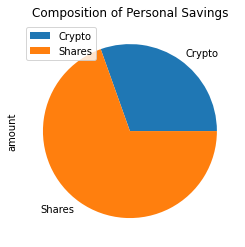

In [22]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = stock_bond_value + crypto_value
print(f"Your total savings to this point is ${total_savings}")

Your total savings to this point is $58520.371


In [24]:
# Validate saving health
# YOUR CODE HERE!
def saving_health(emergency_fund,total_savings):
    if total_savings > emergency_fund:
        print(f"Congratulations! Your total savings of ${total_savings} is greater than your emergency fund of ${emergency_fund}")
    elif total_savings < emergency_fund:
        print(f"You are currently ${emergency_fund-total_savings} away from your financial goal")
    else:
        print("Congratulations! You have reached your financial goal")

saving_health(emergency_fund,total_savings)

Congratulations! Your total savings of $58520.371 is greater than your emergency fund of $36000


## Savings Health Analysis

After assuming that each credit member has a monthly income of 12,000 and requires three months worth of income to properly hedge against an unforeseen event (i.e. unemployment, medical emergencies, ect.) we were able to determine that each member needs to have an emergency fund worth 36,000 USD. By taking this into account and comparing it to the savings information that was determined above, we were able to create a function that analyzes the credit member's financial health by determining the deficit, or lack thereof, between the value of their crypto, stock and bond assets and their emergency fund requirement. 

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [25]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-22', tz='America/New_York').isoformat()

In [26]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca_api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244.0  202.98   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0  206.20   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0  206.97   

                                                              
                             high     low   close     volume  
2015-10-22 00:00:00-04:00  205.51  202.81  205.22  121670959  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  208.97  206.21  208.96  115482088

In [27]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
weights_30 = [.40,.60]
years = 30
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights_30,
    num_simulation = 500,
    num_trading_days = 252*years
)

In [28]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30year.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244.0   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-22 00:00:00-04:00          NaN  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   

                                                   
                              volume daily_return  
2015-10-22 00:00:00-04:00  121670959          NaN  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521

In [29]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997426,1.008911,0.990119,0.991143,0.995602,0.994880,1.000790,1.005769,1.006209,1.006126,...,0.998530,1.002095,0.999093,1.011021,1.001932,1.001414,0.991364,1.011566,1.001293,0.997003
2,1.007839,1.022462,0.984763,0.980974,0.999094,0.992292,0.991688,1.014427,1.003137,1.001963,...,0.999905,1.006476,0.999299,0.998700,0.998731,0.997090,0.973596,1.011947,0.998874,1.007278
3,1.019046,1.021625,0.978103,0.993890,1.004728,1.001411,1.003596,1.019518,0.997028,1.012397,...,0.989269,1.000675,1.008104,0.988296,0.985902,0.998094,0.978590,1.006735,0.997565,1.007044
4,1.015475,1.020072,0.979784,0.989328,0.993223,0.994182,1.003151,1.011528,0.993483,1.016721,...,1.013799,0.996922,1.007007,0.983789,0.989687,1.002778,0.975612,1.013643,1.001937,1.003599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.372864,17.485184,10.613721,18.332356,11.728372,3.214782,4.120380,25.443702,36.405459,21.179833,...,16.260828,10.777573,13.928002,15.475931,5.920576,14.586799,14.237000,5.152015,18.838984,5.773715
7557,7.428390,17.378718,10.537103,18.340894,11.672791,3.207567,4.127182,25.638340,36.341335,21.237717,...,16.237341,10.837192,13.846320,15.561809,5.977675,14.688173,14.109337,5.115949,18.840662,5.727362
7558,7.372989,17.336715,10.518690,18.290422,11.665190,3.204283,4.085766,25.487826,36.150159,21.056996,...,16.429463,10.772773,13.949392,15.597275,6.048632,14.704043,14.071048,5.177313,18.728932,5.722896
7559,7.473774,17.275699,10.577356,18.418630,11.748826,3.241160,4.128851,25.549516,35.855661,20.897146,...,16.460122,10.748673,13.849864,15.518978,6.032641,14.660690,14.071876,5.168852,18.733911,5.706636


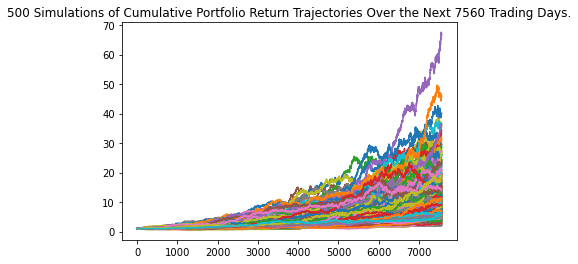

In [30]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_30year.plot_simulation()


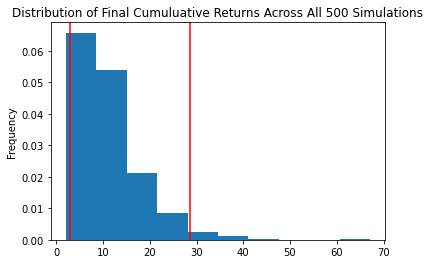

In [31]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_1 = MC_30year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl_1)

count           500.000000
mean             11.380090
std               7.220831
min               2.044226
25%               6.383512
50%               9.708159
75%              14.645079
max              67.127995
95% CI Lower      3.038887
95% CI Upper     28.527678
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [33]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl_1[8]*initial_investment,2)
ci_upper = round(tbl_1[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60777.74 and $570553.57


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [34]:
# Set initial investment
initial_investment_1 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl_1[8]*initial_investment_1,2)
ci_upper = round(tbl_1[9]*initial_investment_1,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $91166.61 and $855830.35


## 30 Year Retirement Plan

After pulling in 5 years of historical data for SPY and AGG, and applying a typical 60/40 split between stocks and bonds for the portfolio, we were able to run 500 simulations to determine the likely growth of the portfolio over the next 30 years. 

Using this forecast and applying a theoretical initial investment of 20,000 USD we were able to calculate, with a confidence of 95%, that the portfolio's value would grow to between 60,777.74 USD and 570,553.57 USD. Interestingly, if the initial investment was to grow by 50%, the future range of the portfolio's value would fall between 91,166.61 and 855,830.35 USD, demonstrating the importance of setting aside a proper amount of savings at the initial time of investment.

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [47]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
# Adjusting weights to be more aggresive in the distribution of investment into equity over fixed income
weights_5 = [.1,.9]
years_5 = 5
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights_5,
    num_simulation = 500,
    num_trading_days = 252*years_5
)
MC_5year.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244.0   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-22 00:00:00-04:00          NaN  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   

                                                   
                              volume daily_return  
2015-10-22 00:00:00-04:00  121670959          NaN  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521

In [48]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006670,1.006649,0.990635,0.988211,0.997701,0.987517,0.996071,0.980362,0.992065,1.016487,...,0.995371,1.012326,0.988250,1.005624,1.018147,1.007392,0.995671,0.995173,1.002600,1.000781
2,1.005794,1.012343,0.972172,0.999921,0.984375,0.998086,0.976111,0.972834,0.991452,1.011564,...,0.985211,1.007649,0.990610,1.013399,1.024696,0.988043,0.990364,1.014620,0.992332,1.026469
3,1.019569,1.027297,0.962732,1.005463,0.969820,1.002249,0.962221,0.965164,0.992385,0.998139,...,0.978918,1.005798,0.982148,1.001864,1.038516,0.965766,1.000440,1.023502,0.995407,1.024858
4,1.033562,1.032887,0.970505,1.014341,0.962840,1.007451,0.963605,0.972749,1.013163,0.987521,...,0.988786,1.000748,0.982465,1.001639,1.040703,0.960993,0.994974,1.019247,0.979979,1.022868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.566413,1.762140,0.858725,1.579818,2.008068,2.955121,1.374972,1.330541,2.231346,1.066475,...,1.233939,2.425872,1.786393,2.139524,1.547455,1.408627,1.288616,0.737227,1.323793,1.593679
1257,0.562037,1.750188,0.873738,1.604239,1.972452,2.930401,1.374681,1.322452,2.243363,1.062202,...,1.266311,2.468497,1.783637,2.203267,1.558060,1.376981,1.270461,0.739606,1.324378,1.590058
1258,0.553794,1.764344,0.889369,1.605078,1.988919,2.914480,1.358682,1.301881,2.257442,1.033853,...,1.264423,2.499269,1.799157,2.236049,1.569665,1.353665,1.268608,0.742556,1.331479,1.599251
1259,0.551297,1.776298,0.888801,1.596500,1.983404,2.943553,1.356264,1.295728,2.253739,1.023967,...,1.268994,2.498959,1.798110,2.277728,1.538682,1.355302,1.266854,0.745062,1.349881,1.583135


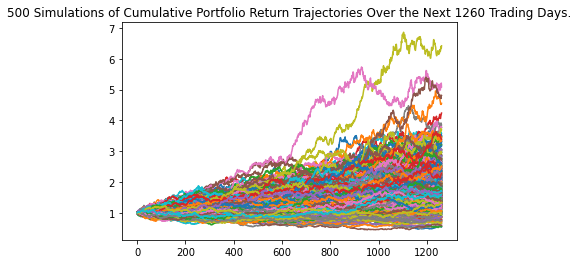

In [49]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_5year.plot_simulation()

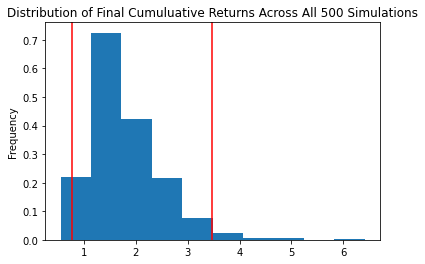

In [50]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_5year.plot_distribution()

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_1 = MC_5year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl_1)

count           500.000000
mean              1.795194
std               0.718213
min               0.545662
25%               1.312141
50%               1.648422
75%               2.192196
max               6.418876
95% CI Lower      0.764413
95% CI Upper      3.461336
Name: 1260, dtype: float64


In [52]:
# Set initial investment
# YOUR CODE HERE!
# Adjusting initial investment to $60,000 to be more aggressive
initial_investment =  60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl_1[8]*initial_investment,2)
ci_upper_five = round(tbl_1[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $45864.75 and $207680.17


## 5 Year Retirement Plan

Obviously, a 5 year retirement plan is far more aggressive than a 30 year one. Therefore, in order to properly simulate this scenario, the weight distribution between stocks and bonds was increased to 90/10 to show a more equity driven portfolio. Furthermore, the initial investment was increased from 20,000 USD to 60,000 USD. After taking this all into account, and running 500 simulations, we were able to determine that, with 95% confidence, that the portfolio would grow to between 45,864.75 USD and 207,680.17 USD. This is obviously not aggressive enough to match the 30 year retirmement plan. In order to reach that goal in 5 years, you would have to be more aggressive with your stake in equity, perhaps foregoing any bond holdings, and increase the value of the initial investment substantially. 

### Ten Years Retirement Option

In [53]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
weights_10 = [0,1]
years_10 = 10
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights_10,
    num_simulation = 500,
    num_trading_days = 252*years_10
)
MC_10year.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244.0   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-22 00:00:00-04:00          NaN  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   

                                                   
                              volume daily_return  
2015-10-22 00:00:00-04:00  121670959          NaN  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521

In [54]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010949,0.988728,1.009661,1.002980,1.008722,0.992219,1.011987,1.003973,0.979425,1.015381,...,1.007178,1.000436,1.001590,1.006231,1.007195,0.993067,1.009784,1.016233,1.015407,0.977028
2,1.027403,0.984017,1.002824,1.010646,1.005694,0.974341,1.007520,0.999354,0.977149,1.030796,...,1.008840,1.014265,0.996403,1.015963,1.007902,0.991442,1.026329,1.011175,1.028378,0.971564
3,1.022031,0.977493,0.996598,1.006316,1.017502,0.964746,1.008383,1.020004,0.979043,1.037860,...,1.010876,1.007174,1.001741,1.025240,1.011687,0.999562,1.019262,1.015113,1.047803,0.959426
4,1.018103,0.960307,0.995845,1.011262,1.028494,0.969974,1.003728,1.023743,0.985988,1.048616,...,1.005094,1.010610,1.000180,1.048272,0.997171,1.005178,1.020708,1.006292,1.044746,0.957655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.417235,3.682755,3.879578,6.256385,7.094112,5.472698,2.092386,11.007923,6.830638,3.376065,...,1.028679,0.922402,7.589319,1.291235,4.249076,2.689489,0.959392,1.977026,4.897090,3.177422
2517,2.458492,3.742563,3.929705,6.346929,7.162517,5.424032,2.078163,10.820523,6.873646,3.458878,...,1.008891,0.921675,7.594149,1.272312,4.324826,2.667590,0.980307,1.967919,4.842324,3.218386
2518,2.477114,3.787015,3.877270,6.387876,7.101661,5.513961,2.061166,10.787475,6.893511,3.437360,...,1.008907,0.913903,7.566405,1.257026,4.274543,2.709871,0.967710,1.975085,4.814245,3.224667
2519,2.505493,3.858037,3.863332,6.372543,6.887434,5.637664,2.052188,10.856736,6.989054,3.444302,...,1.003050,0.904953,7.721426,1.247911,4.322822,2.774594,0.953518,1.970026,4.870428,3.320212


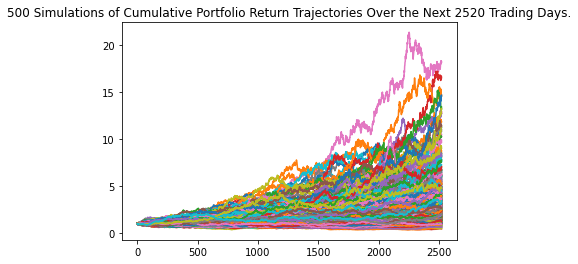

In [55]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_10year.plot_simulation()

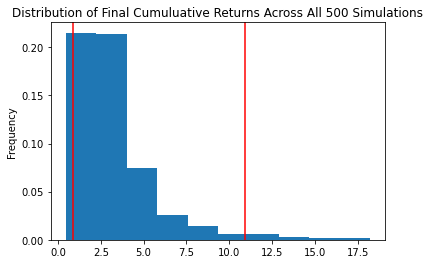

In [56]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_10year.plot_distribution()

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_1 = MC_10year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_1)

count           500.000000
mean              3.300836
std               2.437757
min               0.457539
25%               1.835196
50%               2.673511
75%               3.948601
max              18.220710
95% CI Lower      0.875263
95% CI Upper     10.928460
Name: 2520, dtype: float64


In [58]:
# Set initial investment
# YOUR CODE HERE!
inital_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl_1[8]*initial_investment,2)
ci_upper_ten = round(tbl_1[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $52515.77 and $655707.6


## 10 Year Retirement Plan

Just like the 5 year retirement plan, the 10 year retirement plan needs to be incredible more aggressive than its 30 year counterpart. In order to accomplish this goal, the weight distribution was again altered, but was even more aggresive in that it gave a 100% stake to equity. The initial investment was set at 60,000 USD. After taking this into account and running 500 simulations we were able to determine that the value of the portfolio would fall between 52,515.77 and 655,707.60 USD 95% of the time. This investment strategy did have a higher ceiling than the 30 year retirement plan, but had a slightly deeper valley indicating that it is far more risky.